# MASS FUNCTIONS OF SIMULATED GC POPULATIONS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
import pynbody
import os

In [2]:
def get_mass_functions(simulation, age_intermediate=6., age_old=10., inner_radius=0., outer_radius=100., plot_agedistribution=False):
    s = pynbody.load(simulation+'/output/snapdir_127/snapshot_127')
    h = s.halos()

    transform = pynbody.analysis.angmom.faceon(h[0])
    s.physical_units()
    main = h[0]

    mask_clusters_initial = (main.s['InitialNumberOfClusters'] > 0 ) * (main.s['r'].in_units('kpc')>inner_radius) * (main.s['r'].in_units('kpc')<=outer_radius)
    
    cluster_masses = main.s['ClusterMass'][mask_clusters_initial].flatten()
    init_cluster_masses = main.s['InitialClusterMass'][mask_clusters_initial].flatten()
    
    not_empty_clusters = (init_cluster_masses>0)

    cluster_masses = cluster_masses[not_empty_clusters]
    init_cluster_masses = init_cluster_masses[not_empty_clusters]
    
    print('Maximum initial mass {:2.2e} Msun'.format(init_cluster_masses.max()))
    print('Maximum present-day mass {:2.2e} Msun'.format(cluster_masses.max()))

    clusters_birthtime = []
    clusters_age = []
    for i, nclt in enumerate(main.s['InitialNumberOfClusters'][mask_clusters_initial]):
        clusters_birthtime.append(np.ones(nclt) * main.s['tform'].in_units('Gyr')[mask_clusters_initial][i])
        clusters_age.append(np.ones(nclt) * main.s['age'].in_units('Gyr')[mask_clusters_initial][i])

    clusters_birthtime = np.concatenate(clusters_birthtime)
    clusters_age = np.concatenate(clusters_age)

    mask_problematic = main.s['InitialMassFractionInClusters']>1
    print('Problematic stars with clusters {:4d}'.format(mask_problematic.sum()))
    print('That`s {:.3f}% of stars with clusters'.format(mask_problematic.sum()/mask_clusters_initial.sum() * 100))

    if plot_agedistribution:
        plt.hist(clusters_age[cluster_masses>0.], bins=20, histtype='step', density=True)
        plt.xlabel('Cluster`s age [Gyr]')
        plt.ylabel('Age Distribution')
        plt.title(simulation)
        plt.show()

    old_mask = (clusters_age>age_intermediate) * (cluster_masses>0.)
    veryold_mask = (clusters_age>age_old) * (cluster_masses>0.)

    nbins = 25
    min_gcmf = 1e2 # in solar masses
    max_gcmf = 1e8 # in solar masses
    marray_gcmf = np.linspace(np.log10(min_gcmf), np.log10(max_gcmf), nbins + 1)
    width = np.diff(marray_gcmf)

    N,_ = np.histogram(np.log10(init_cluster_masses), bins=marray_gcmf)
    initial_population = N/width
    N,_ = np.histogram(np.log10(cluster_masses[cluster_masses>0.]), bins=marray_gcmf)
    full_population = N/width
    N,_ = np.histogram(np.log10(cluster_masses[old_mask]), bins=marray_gcmf)
    intermediate_population = N/width
    N,_ = np.histogram(np.log10(cluster_masses[veryold_mask]), bins=marray_gcmf)
    old_population = N/width

    return [initial_population, full_population, intermediate_population, old_population]
    

In [31]:
simulation_list = [directory for directory in os.listdir('.') if 'd4e5' in directory]
print(simulation_list)

['Au6_lvl5_d4e5', 'Au6_lvl5_d4e5_evboost', 'Au6_lvl5_d4e5_shboost', 'Au6_lvl5_d4e5_bothboost']


Define global variables for comparing the mass functions

In [4]:
nbins = 25
min_gcmf = 1e2 # in solar masses
max_gcmf = 1e8 # in solar masses
marray_gcmf = np.linspace(np.log10(min_gcmf), np.log10(max_gcmf), nbins + 1)
width = np.diff(marray_gcmf)

In [5]:
m31_masses = np.genfromtxt('catalogues_compare/Caldwell_dataonly.txt', usecols=11, delimiter=',')
m31_rgc = np.genfromtxt('catalogues_compare/Caldwell_dataonly.txt', usecols=12, delimiter=',')
N,_ = np.histogram(m31_masses, bins=marray_gcmf)
m31_mass_function = N/width
N,_ = np.histogram(m31_masses[m31_rgc <= 3.], bins=marray_gcmf)
m31_inner_mass_function = N/width
N,_ = np.histogram(m31_masses[(m31_rgc > 3.) * (m31_rgc <= 9.)], bins=marray_gcmf)
m31_intermediate_mass_function = N/width
N,_ = np.histogram(m31_masses[(m31_rgc > 9.)], bins=marray_gcmf)
m31_outer_mass_function = N/width

mw_catalogue = np.genfromtxt('catalogues_compare/Harris_onlyphotometry.txt', usecols=(0,6,12), delimiter=',', skip_header=1)
mw_masses = np.log10(1.7 * 10**(0.4*(4.83 - mw_catalogue[:,1])))
mw_rgc = mw_catalogue[:,2]
N,_ = np.histogram(mw_masses, bins=marray_gcmf)
mw_mass_function = N/width
N,_ = np.histogram(mw_masses[mw_rgc <= 3.], bins=marray_gcmf)
mw_inner_mass_function = N/width
N,_ = np.histogram(mw_masses[(mw_rgc > 3.) * (mw_rgc <= 9.)], bins=marray_gcmf)
mw_intermediate_mass_function = N/width
N,_ = np.histogram(mw_masses[(mw_rgc > 9.)], bins=marray_gcmf)
mw_outer_mass_function = N/width

In [32]:
initial_population =[]
full_population = []
intermediate_population = []
old_population = []

In [33]:
base_init, base_full, base_intermediate, base_old = get_mass_functions(simulation_list[0])

/users/aripcont/.local/lib/python3.10/site-packages/pynbody/snapshot/gadgethdf.py:403: UserWarning: Masses are either stored in the header or have another dataset name; assuming the cosmological factor h**-1
  warnings.warn("Masses are either stored in the header or have another dataset name; assuming the cosmological factor %s" % units.h**-1)


Maximum initial mass 1.13e+07 Msun
Maximum present-day mass 6.50e+06 Msun


/users/aripcont/.local/lib/python3.10/site-packages/pynbody/array/__init__.py:310: RuntimeWarning: invalid value encountered in log
  result = super().__array_ufunc__(ufunc, method, *inputs, **kwargs)


Problematic stars with clusters   79
That`s 1.120% of stars with clusters


Text(0.5, 1.0, 'Au6_lvl5_d4e5')

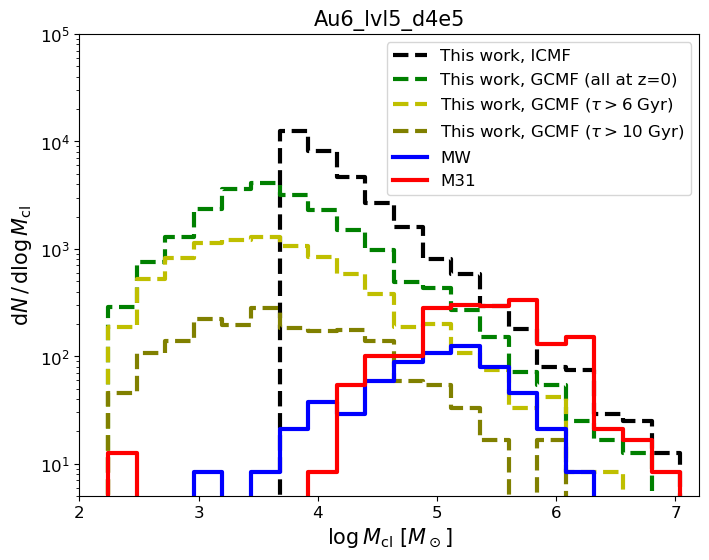

In [34]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.step(marray_gcmf[:-1], base_init, where='post',c='k', linestyle='dashed', linewidth = 3, label='This work, ICMF')
ax.step(marray_gcmf[:-1], base_full, where='post',c='g', linestyle='dashed', linewidth = 3, label='This work, GCMF (all at z=0)')
ax.step(marray_gcmf[:-1], base_intermediate, where='post',c='y', linestyle='dashed', linewidth = 3, label=r'This work, GCMF ($\tau > 6$ Gyr)')
ax.step(marray_gcmf[:-1], base_old, where='post',c='olive', linestyle='dashed', linewidth = 3, label=r'This work, GCMF ($\tau > 10$ Gyr)')
ax.step(marray_gcmf[:-1], mw_mass_function, where='post',linewidth=3, c='b', label='MW')
ax.step(marray_gcmf[:-1], m31_mass_function, where='post',linewidth=3, c='r', label='M31')
ax.set_xlim(2,7.2)
ax.set_xlabel(r'$\log M_{\mathrm{cl}}$ $[M_\odot]$', fontsize=15)
ax.set(ylim=(5e0,1e5), yscale= 'log')
ax.set_ylabel(r'$\mathrm{d}N \, / \, \mathrm{d} \log M_{\mathrm{cl}}$', fontsize=15)
ax.tick_params(labelsize=12)
ax.legend(loc='upper right', fontsize=12)
ax.set_title(simulation_list[0], fontsize=15)

In [35]:
for sim in simulation_list:
    init, full, intermediate, old = get_mass_functions(sim)
    initial_population.append(init)
    full_population.append(full)
    intermediate_population.append(intermediate)
    old_population.append(old)

Maximum initial mass 1.13e+07 Msun
Maximum present-day mass 6.50e+06 Msun
Problematic stars with clusters   79
That`s 1.120% of stars with clusters
Maximum initial mass 1.13e+07 Msun
Maximum present-day mass 6.47e+06 Msun
Problematic stars with clusters   79
That`s 1.120% of stars with clusters
Maximum initial mass 1.13e+07 Msun
Maximum present-day mass 6.50e+06 Msun
Problematic stars with clusters   79
That`s 1.120% of stars with clusters
Maximum initial mass 1.13e+07 Msun
Maximum present-day mass 6.47e+06 Msun
Problematic stars with clusters   79
That`s 1.120% of stars with clusters


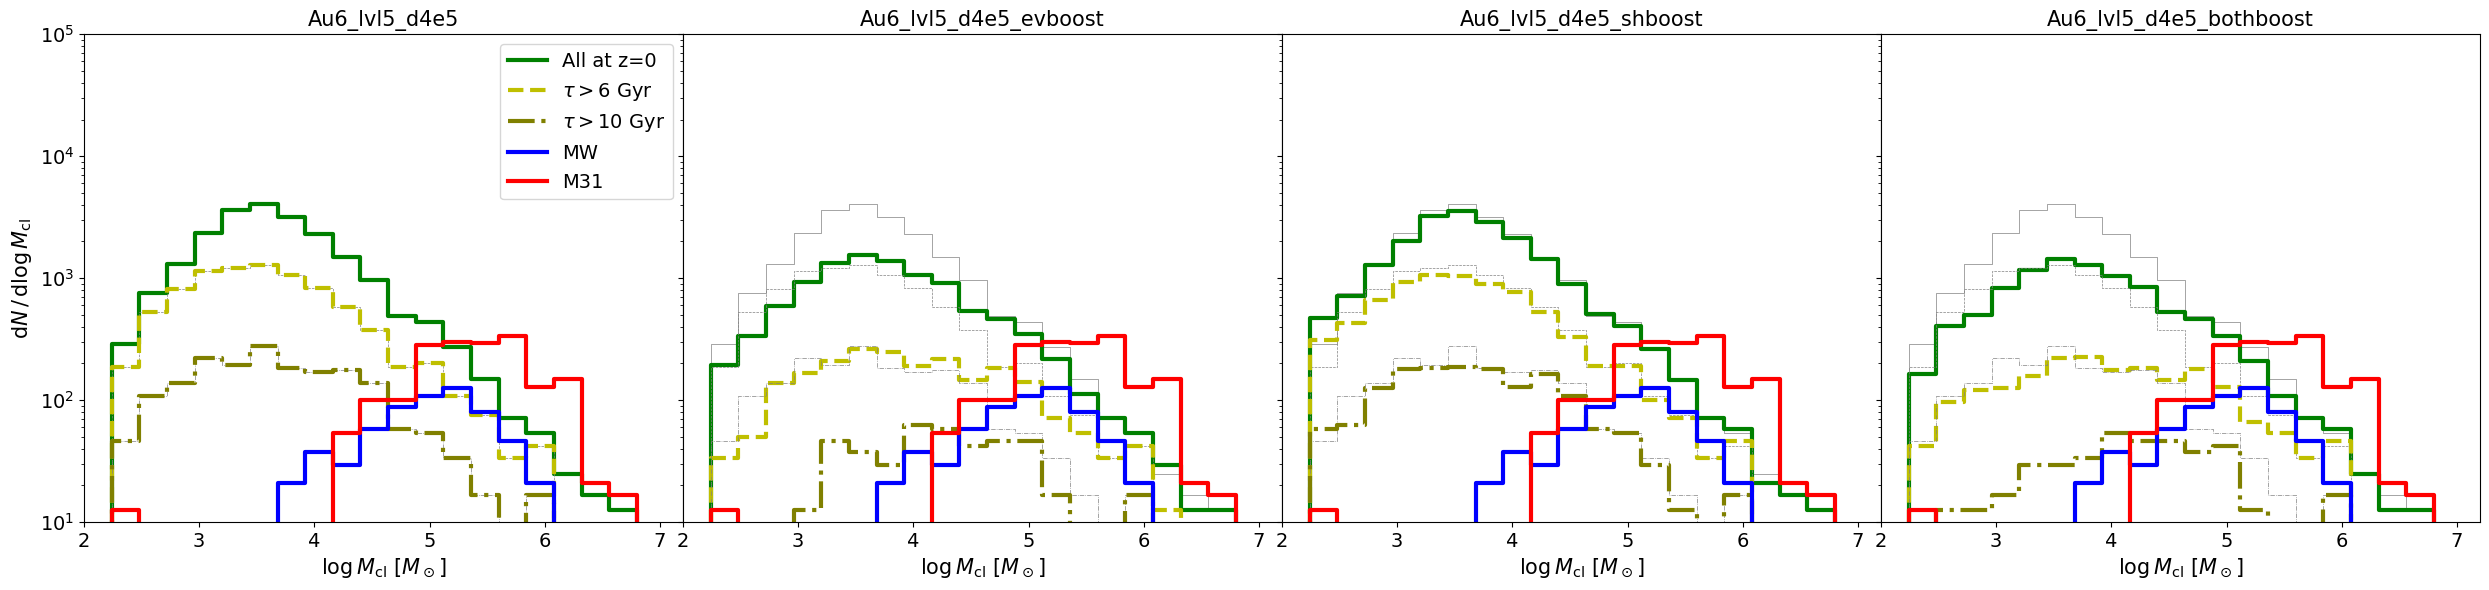

In [36]:
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(25,6))

for i,mf in enumerate(full_population):
  ax[i].step(marray_gcmf[:-1], base_full, where='post', c='grey', linewidth=0.5)
  ax[i].step(marray_gcmf[:-1], mf, where='post', c='g', linewidth=3, label='All at z=0')

for i,mf in enumerate(intermediate_population):
  ax[i].step(marray_gcmf[:-1], base_intermediate, where='post', c='grey', linestyle='--', linewidth=0.5)
  ax[i].step(marray_gcmf[:-1], mf, where='post', c='y', linewidth=3, linestyle='--', label=r'$\tau > 6$ Gyr')
  
for i,mf in enumerate(old_population):
  ax[i].step(marray_gcmf[:-1], base_old, where='post', c='grey', linestyle='-.', linewidth=0.5)
  ax[i].step(marray_gcmf[:-1], mf, where='post', c='olive', linewidth=3, linestyle='-.', label=r'$\tau > 10$ Gyr')

for i in range(4):
  ax[i].step(marray_gcmf[:-1], mw_mass_function, where='post', linewidth=3, c='b', label='MW')
  ax[i].step(marray_gcmf[:-1], m31_mass_function, where='post', linewidth=3, c='r', label='M31')
  ax[i].set_xlim(2,7.2)
  ax[i].set_xlabel(r'$\log M_{\mathrm{cl}}$ $[M_\odot]$', fontsize=15)
  ax[i].tick_params(labelsize=14)
  ax[i].set_title(simulation_list[i], fontsize=15)

ax[0].set(ylim=(1e1,1e5), yscale= 'log')
ax[0].set_ylabel(r'$\mathrm{d}N \, / \, \mathrm{d} \log M_{\mathrm{cl}}$', fontsize=15)
ax[0].legend(loc='upper right', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.savefig('plots/noformphys_gcmf_compare.pdf')

In [43]:
all_init, all_full, all_intermediate, all_old = get_mass_functions(simulation_list[0], age_intermediate=6., age_old=10.)
inner_init, inner_full, inner_intermediate, inner_old = get_mass_functions(simulation_list[0], outer_radius=3., age_intermediate=6., age_old=10.)
intermediate_init, intermediate_full, intermediate_intermediate, intermediate_old = get_mass_functions(simulation_list[0], inner_radius=3., outer_radius=9., age_intermediate=6., age_old=10.)
outer_init, outer_full, outer_intermediate, outer_old = get_mass_functions(simulation_list[0], inner_radius=9., age_intermediate=6., age_old=10.)

/users/aripcont/.local/lib/python3.10/site-packages/pynbody/snapshot/gadgethdf.py:403: UserWarning: Masses are either stored in the header or have another dataset name; assuming the cosmological factor h**-1
  warnings.warn("Masses are either stored in the header or have another dataset name; assuming the cosmological factor %s" % units.h**-1)


Maximum initial mass 1.13e+07 Msun
Maximum present-day mass 6.50e+06 Msun


/users/aripcont/.local/lib/python3.10/site-packages/pynbody/array/__init__.py:310: RuntimeWarning: invalid value encountered in log
  result = super().__array_ufunc__(ufunc, method, *inputs, **kwargs)


Problematic stars with clusters   79
That`s 1.120% of stars with clusters
Maximum initial mass 4.78e+06 Msun
Maximum present-day mass 2.62e+06 Msun
Problematic stars with clusters   79
That`s 4.700% of stars with clusters
Maximum initial mass 7.74e+06 Msun
Maximum present-day mass 4.28e+06 Msun
Problematic stars with clusters   79
That`s 3.185% of stars with clusters
Maximum initial mass 1.13e+07 Msun
Maximum present-day mass 6.50e+06 Msun
Problematic stars with clusters   79
That`s 2.731% of stars with clusters


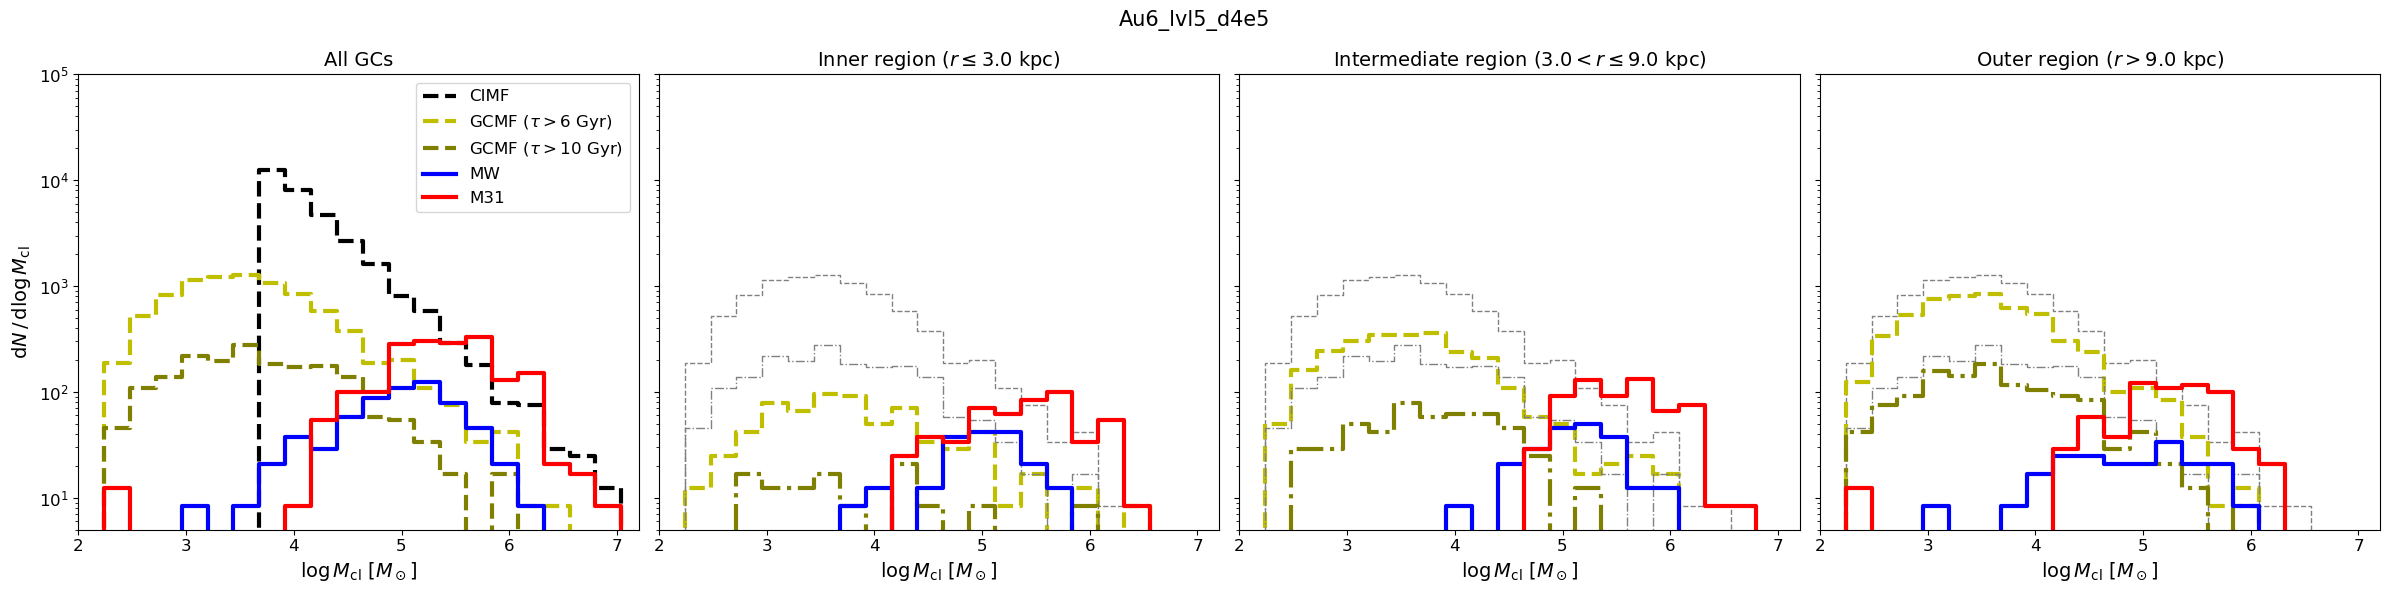

In [44]:
fig, ax = plt.subplots(1,4, figsize=(24,6), sharey=True)

ax[0].step(marray_gcmf[:-1], all_init, where='post',c='k', linestyle='dashed', linewidth = 3, label='CIMF')
# ax[0].step(marray_gcmf[:-1], all_full, where='post',c='g', linestyle='dashed', linewidth = 3, label='GCMF (all at z=0)')
ax[0].step(marray_gcmf[:-1], all_intermediate, where='post',c='y', linestyle='dashed', linewidth = 3, label=r'GCMF ($\tau > 6$ Gyr)')
ax[0].step(marray_gcmf[:-1], all_old, where='post',c='olive', linestyle='dashed', linewidth = 3, label=r'GCMF ($\tau > 10$ Gyr)')
ax[0].step(marray_gcmf[:-1], mw_mass_function, where='post',linewidth=3, c='b', label='MW')
ax[0].step(marray_gcmf[:-1], m31_mass_function, where='post',linewidth=3, c='r', label='M31')
ax[0].set_title('All GCs', fontsize=14)
ax[0].set_xlim(2,7.2)
ax[0].set_xlabel(r'$\log M_{\mathrm{cl}}$ $[M_\odot]$', fontsize=14)
ax[0].tick_params(labelsize=12)

# ax[1].step(marray_gcmf[:-1], inner_init, where='post',c='k', linestyle='dashed', linewidth = 3, label='CIMF')
# ax[1].step(marray_gcmf[:-1], inner_full, where='post',c='g', linestyle='dashed', linewidth = 3, label='GCMF (all at z=0)')
ax[1].step(marray_gcmf[:-1], all_intermediate, where='post',c='gray', linestyle='dashed', linewidth = 1, label=r'GCMF ($\tau > 6$ Gyr)')
ax[1].step(marray_gcmf[:-1], inner_intermediate, where='post',c='y', linestyle='dashed', linewidth = 3, label=r'GCMF ($\tau > 6$ Gyr)')
ax[1].step(marray_gcmf[:-1], all_old, where='post',c='gray', linestyle='dashdot', linewidth = 1, label=r'GCMF ($\tau > 10$ Gyr)')
ax[1].step(marray_gcmf[:-1], inner_old, where='post',c='olive', linestyle='dashdot', linewidth = 3, label=r'GCMF ($\tau > 10$ Gyr)')
ax[1].step(marray_gcmf[:-1], mw_inner_mass_function, where='post',linewidth=3, c='b', label='MW')
ax[1].step(marray_gcmf[:-1], m31_inner_mass_function, where='post',linewidth=3, c='r', label='M31')
ax[1].set_title(r'Inner region ($r \leq 3.0$ kpc)', fontsize=14)
ax[1].set_xlim(2,7.2)
ax[1].set_xlabel(r'$\log M_{\mathrm{cl}}$ $[M_\odot]$', fontsize=14)
ax[1].tick_params(labelsize=12)

# ax[2].step(marray_gcmf[:-1], intermediate_init, where='post',c='k', linestyle='dashed', linewidth = 3, label='CIMF')
# ax[2].step(marray_gcmf[:-1], intermediate_full, where='post',c='g', linestyle='dashed', linewidth = 3, label='GCMF (all at z=0)')
ax[2].step(marray_gcmf[:-1], all_intermediate, where='post',c='gray', linestyle='dashed', linewidth = 1, label=r'GCMF ($\tau > 6$ Gyr)')
ax[2].step(marray_gcmf[:-1], intermediate_intermediate, where='post',c='y', linestyle='dashed', linewidth = 3, label=r'GCMF ($\tau > 6$ Gyr)')
ax[2].step(marray_gcmf[:-1], all_old, where='post',c='gray', linestyle='dashdot', linewidth = 1, label=r'GCMF ($\tau > 10$ Gyr)')
ax[2].step(marray_gcmf[:-1], intermediate_old, where='post',c='olive', linestyle='dashdot', linewidth = 3, label=r'GCMF ($\tau > 10$ Gyr)')
ax[2].step(marray_gcmf[:-1], mw_intermediate_mass_function, where='post',linewidth=3, c='b', label='MW')
ax[2].step(marray_gcmf[:-1], m31_intermediate_mass_function, where='post',linewidth=3, c='r', label='M31')
ax[2].set_title(r'Intermediate region ($3.0 < r \leq 9.0$ kpc)', fontsize=14)
ax[2].set_xlim(2,7.2)
ax[2].set_xlabel(r'$\log M_{\mathrm{cl}}$ $[M_\odot]$', fontsize=14)
ax[2].tick_params(labelsize=12)

# ax[3].step(marray_gcmf[:-1], outer_init, where='post',c='k', linestyle='dashed', linewidth = 3, label='CIMF')
# ax[3].step(marray_gcmf[:-1], outer_full, where='post',c='g', linestyle='dashed', linewidth = 3, label='GCMF (all at z=0)')
ax[3].step(marray_gcmf[:-1], all_intermediate, where='post',c='gray', linestyle='dashed', linewidth = 1, label=r'GCMF ($\tau > 6$ Gyr)')
ax[3].step(marray_gcmf[:-1], outer_intermediate, where='post',c='y', linestyle='dashed', linewidth = 3, label=r'GCMF ($\tau > 6$ Gyr)')
ax[3].step(marray_gcmf[:-1], all_old, where='post',c='gray', linestyle='dashdot', linewidth =1, label=r'GCMF ($\tau > 10$ Gyr)')
ax[3].step(marray_gcmf[:-1], outer_old, where='post',c='olive', linestyle='dashdot', linewidth = 3, label=r'GCMF ($\tau > 10$ Gyr)')
ax[3].step(marray_gcmf[:-1], mw_outer_mass_function, where='post',linewidth=3, c='b', label='MW')
ax[3].step(marray_gcmf[:-1], m31_outer_mass_function, where='post',linewidth=3, c='r', label='M31')
ax[3].set_title(r'Outer region ($r > 9.0$ kpc)', fontsize=14)
ax[3].set_xlim(2,7.2)
ax[3].set_xlabel(r'$\log M_{\mathrm{cl}}$ $[M_\odot]$', fontsize=14)
ax[3].tick_params(labelsize=12)


ax[0].set(ylim=(5e0,1e5), yscale= 'log')
ax[0].set_ylabel(r'$\mathrm{d}N \, / \, \mathrm{d} \log M_{\mathrm{cl}}$', fontsize=14)
ax[0].legend(loc='upper right', fontsize=12)
plt.suptitle(simulation_list[0], fontsize=15)
plt.tight_layout()
plt.savefig('plots/noformphys_gcmf_radialbins.pdf')